### Multivariate Time Series Analysis with stock prices.

#### Imports the Libraries

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# data set from: https://finance.yahoo.com/quote/TSLA/history
#                https://finance.yahoo.com/quote/%5ESPX/history/

### 1) Data Preprocessing

#### Reads the csv file and set the time period for alignment

In [202]:
# Reads the tesla stock data into pandas dataframe
TSLA = pd.read_csv('TSLA.csv')
TSLA = TSLA[TSLA['Date'] > "2010-06-30"]
TSLA = TSLA[TSLA['Date'] < "2023-12-31"]
TSLA['Date'] = pd.to_datetime(TSLA['Date'])
TSLA.index = TSLA['Date']
TSLA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-12-22,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


#### Visualize TSLA Stock with Open Prices

<Axes: xlabel='Date'>

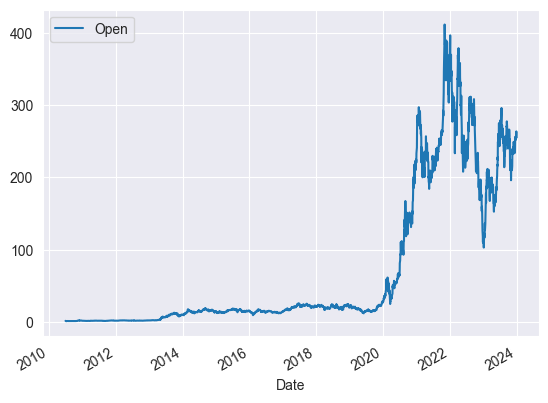

In [203]:
TSLA.plot(x='Date', y='Open')

#### Resampled the TSLA Data to make sure there's no missing date, use .interpolate to fill in missing values.

In [204]:
#upsample the TSLA to fill missing data.
TSLA_upsampled = TSLA.resample('D').interpolate(method='linear')
TSLA_upsampled.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-12-25,2023-12-25,255.057506,258.032501,252.525002,255.592487,255.592487,88481750.0
2023-12-26,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0
2023-12-27,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0
2023-12-28,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900.0
2023-12-29,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300.0


#### Reads the csv file for Interest_rate data and set the time period for alignment.

In [205]:
# Reads the Interest_rate data into pandas dataframe
interest_rate = pd.read_csv('FEDFUNDS.csv')
interest_rate = interest_rate[interest_rate['DATE'] > "2010-06-30"]
interest_rate = interest_rate[interest_rate['DATE'] < "2024-01-02"]
interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'])
interest_rate.index = interest_rate['DATE']
interest_rate.tail()

,DATE,FEDFUNDS
DATE,,
2023-09-01,2023-09-01,5.33
2023-10-01,2023-10-01,5.33
2023-11-01,2023-11-01,5.33
2023-12-01,2023-12-01,5.33
2024-01-01,2024-01-01,5.33


#### plot the interest rate for visualization

<Axes: xlabel='DATE'>

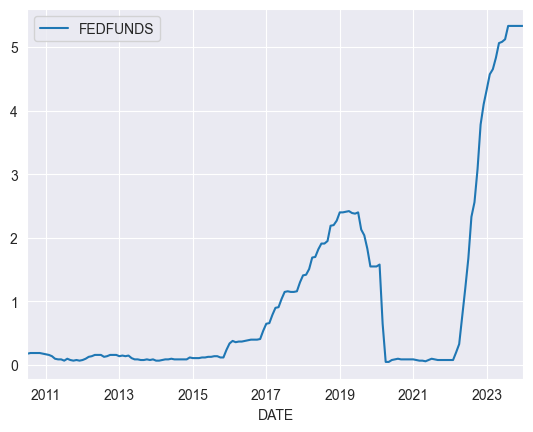

In [206]:
interest_rate.plot(x='DATE')

#### Up-sampled Interest rate data from monthly to daily. Use .interpolate function to fill in missing values.

In [207]:
#upsample the interest rate from each month to each day
interest_rate_upsampled = interest_rate.resample('D').interpolate(method='linear')
interest_rate_upsampled.tail()

,DATE,FEDFUNDS
DATE,,
2023-12-28,2023-12-28,5.33
2023-12-29,2023-12-29,5.33
2023-12-30,2023-12-30,5.33
2023-12-31,2023-12-31,5.33
2024-01-01,2024-01-01,5.33


#### Merge the two dataset into one dataframe, make sure that all the values are in float type.

In [208]:
#merge two dataset to one dataframe
TSLA_cols = TSLA_upsampled.columns[1:7]
interest_rate_cols = interest_rate_upsampled.columns[1]
df = TSLA_upsampled[TSLA_cols].astype(float)
df.insert(6, "Interest_rate", interest_rate_upsampled[interest_rate_cols].astype(float))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Interest_rate
Date,,,,,,,
2010-07-01,1.666667,1.728000,1.351333,1.4640,1.4640,123282000.0,0.180000
2010-07-02,1.533333,1.540000,1.247333,1.2800,1.2800,77097000.0,0.180323
2010-07-03,1.483333,1.488333,1.199333,1.2285,1.2285,83573625.0,0.180645
2010-07-04,1.433333,1.436667,1.151333,1.1770,1.1770,90050250.0,0.180968
2010-07-05,1.383333,1.385000,1.103333,1.1255,1.1255,96526875.0,0.181290


In [209]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Interest_rate
Date,,,,,,,
2023-12-25,255.057506,258.032501,252.525002,255.592487,255.592487,88481750.0,5.33
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0,5.33
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0,5.33
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900.0,5.33
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300.0,5.33


#### Exploratory Data Analysis

#### Adding rolling window features

In [210]:
# Adding rolling window features
sliding_window_size = 14
df['TSLA_rolling_mean'] = df['Open'].rolling(window=sliding_window_size).mean()
df['Interest_rate_rolling_mean'] = df['Interest_rate'].rolling(window=sliding_window_size).mean()
df['TSLA_rolling_std'] = df['Open'].rolling(window=sliding_window_size).std()
df['Interest_rate_rolling_std'] = df['Interest_rate'].rolling(window=sliding_window_size).std()
# Drop rows with NaN values if any
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Interest_rate,TSLA_rolling_mean,Interest_rate_rolling_mean,TSLA_rolling_std,Interest_rate_rolling_std
Date,,,,,,,,,,,
2010-07-14,1.196000,1.343333,1.184000,1.322667,1.322667,62928000.0,0.184194,1.292524,0.182097,0.180788,0.001349
2010-07-15,1.329333,1.433333,1.266667,1.326000,1.326000,56097000.0,0.184516,1.268428,0.182419,0.146271,0.001349
2010-07-16,1.380000,1.420000,1.336667,1.376000,1.376000,39319500.0,0.184839,1.257476,0.182742,0.129713,0.001349
2010-07-17,1.394889,1.441111,1.356000,1.404222,1.404222,38645500.0,0.185161,1.251159,0.183065,0.119629,0.001349
2010-07-18,1.409778,1.462222,1.375334,1.432445,1.432445,37971500.0,0.185484,1.249476,0.183387,0.117007,0.001349


<Axes: >

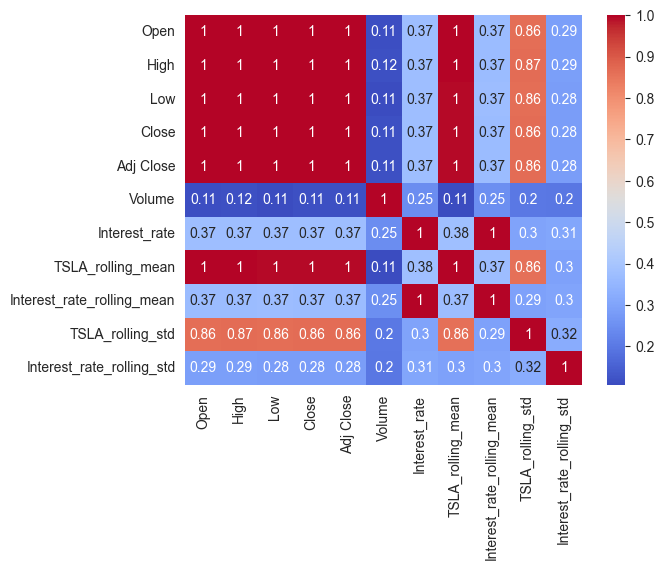

In [211]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### Normalization, use the Standard Scaler from scikit learn.

In [212]:
scaler = StandardScaler()
scaler = scaler.fit(df) 
df_scaled = scaler.transform(df)

#### Creating training and target dataset using lag features.

In [213]:
Train_X = []
Train_Y = []

predict_days = 1
sliding_window_size = 14
for i in range(sliding_window_size, len(df_scaled) - predict_days + 1):
    Train_X.append(df_scaled[i - sliding_window_size:i, 0:df_scaled.shape[1]])
    Train_Y.append(df_scaled[i + predict_days - 1:i + predict_days, 0])
    
Train_X = np.array(Train_X)
Train_Y = np.array(Train_Y)

print(f'x.shape: {Train_X.shape}')
print(f'y.shape: {Train_Y.shape}')

x.shape: (4903, 14, 11)
y.shape: (4903, 1)


### 2) Model Building

In [214]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (Train_X.shape[1], Train_X.shape[2]), return_sequences = True))
model.add(LSTM(32, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(Train_Y.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 14, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,905 (124.63 KB)

 Trainable params: 31,905 (124.63 KB)

 Non-trainable params: 0 (0.00 B)

#### fit model

In [215]:
history = model.fit(Train_X, Train_Y, epochs = 10, batch_size = 16, validation_split = 0.1, verbose = 1)

Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1185 - val_loss: 0.0458
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0282 - val_loss: 0.0452
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0250 - val_loss: 0.0665
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0241 - val_loss: 0.0278
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0274 - val_loss: 0.0197
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0251 - val_loss: 0.0250
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0266 - val_loss: 0.0541
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0197 - val_loss: 0.0218
Epoch 9/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0208 - val_loss: 0.0411
Epoch 10/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0234 - val_loss: 0.0100


#### Training loss, Validation loss

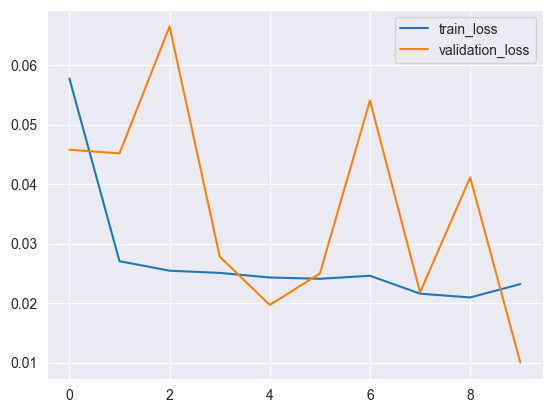

In [216]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='validation_loss')
plt.legend()

### 3) Forcasting

In [217]:
predict_days = 90
predict_period_dates = pd.date_range('2024-02-22', periods = predict_days, freq = '1d').tolist()
forcast = model.predict(Train_X[-predict_days:])
forcast

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[1.7304883],
       [1.7289644],
       [1.7241071],
       [1.7158681],
       [1.7250936],
       [1.7415974],
       [1.7465725],
       [1.7543484],
       [1.7612665],
       [1.7674007],
       [1.7832187],
       [1.8027949],
       [1.8045079],
       [1.7929977],
       [1.7856826],
       [1.777383 ],
       [1.7692415],
       [1.7647887],
       [1.7425934],
       [1.6829818],
       [1.6378454],
       [1.6053886],
       [1.5808816],
       [1.5628697],
       [1.5651218],
       [1.5541481],
       [1.5298653],
       [1.5151438],
       [1.490699 ],
       [1.4583389],
       [1.4184994],
       [1.3804674],
       [1.3481561],
       [1.3498544],
       [1.3650503],
       [1.38162  ],
       [1.3998243],
       [1.417575 ],
       [1.4325072],
       [1.4495177],
       [1.4427929],
       [1.4394733],
       [1.4426075],
       [1.4496236],
       [1.4604286],
       [1.5019063],
       [1.5430459],
       [1.5618415],
       [1.5726265],
       [1.5830176],


#### Perform Inverse Transformation to rescale back to original range

In [218]:
# Since we used 5 variables for transform, the inverse expect same dimension. Copied the columns 5 times will solve the issue.

forcast_copies = np.repeat(forcast, df_scaled.shape[1], axis =-1)
Predict_future_values = scaler.inverse_transform(forcast_copies)[:, 0]
Predict_future_values

array([246.17969, 246.02505, 245.53218, 244.69615, 245.63228, 247.30695,
       247.81178, 248.60083, 249.30281, 249.92528, 251.53036, 253.5168 ,
       253.69061, 252.52266, 251.78036, 250.93819, 250.11206, 249.66023,
       247.40802, 241.3591 , 236.779  , 233.48555, 230.99876, 229.17105,
       229.39958, 228.28606, 225.82202, 224.3282 , 221.84775, 218.56409,
       214.52148, 210.6623 , 207.38359, 207.55592, 209.09789, 210.77927,
       212.62648, 214.42769, 215.94289, 217.66899, 216.9866 , 216.64975,
       216.96779, 217.67973, 218.77614, 222.98497, 227.1595 , 229.06673,
       230.1611 , 231.21552, 232.12825, 232.96548, 234.49294, 235.17241,
       235.65292, 235.5709 , 235.06091, 234.23769, 233.07915, 233.91351,
       235.84384, 236.13638, 235.5877 , 235.3034 , 234.95561, 234.68336,
       234.91072, 235.8727 , 236.77261, 237.67264, 238.18036, 238.48877,
       238.36606, 237.42801, 236.53094, 238.52435, 241.02324, 243.08565,
       244.79323, 246.17958, 247.79889, 247.76912, 

In [219]:
# Convert timestamp to date:
forcast_dates = []
for i in predict_period_dates:
    forcast_dates.append(i.date())
    
df_forcast = pd.DataFrame({'Date':np.array(forcast_dates),'Open':Predict_future_values}) 

<Axes: xlabel='Date'>

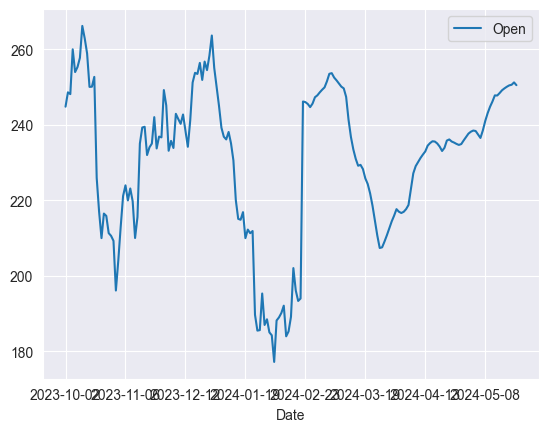

In [220]:
TSLA_original = pd.read_csv('TSLA.csv')
TSLA_original = TSLA_original[['Date', 'Open']]
TSLA_original = TSLA_original[TSLA_original['Date'] > "2023-1-30"]
frames = [TSLA_original, df_forcast]
result = pd.concat(frames)
result.plot(x='Date', y='Open')
